In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [7 5 1 6 2 6 5 5 9 8]


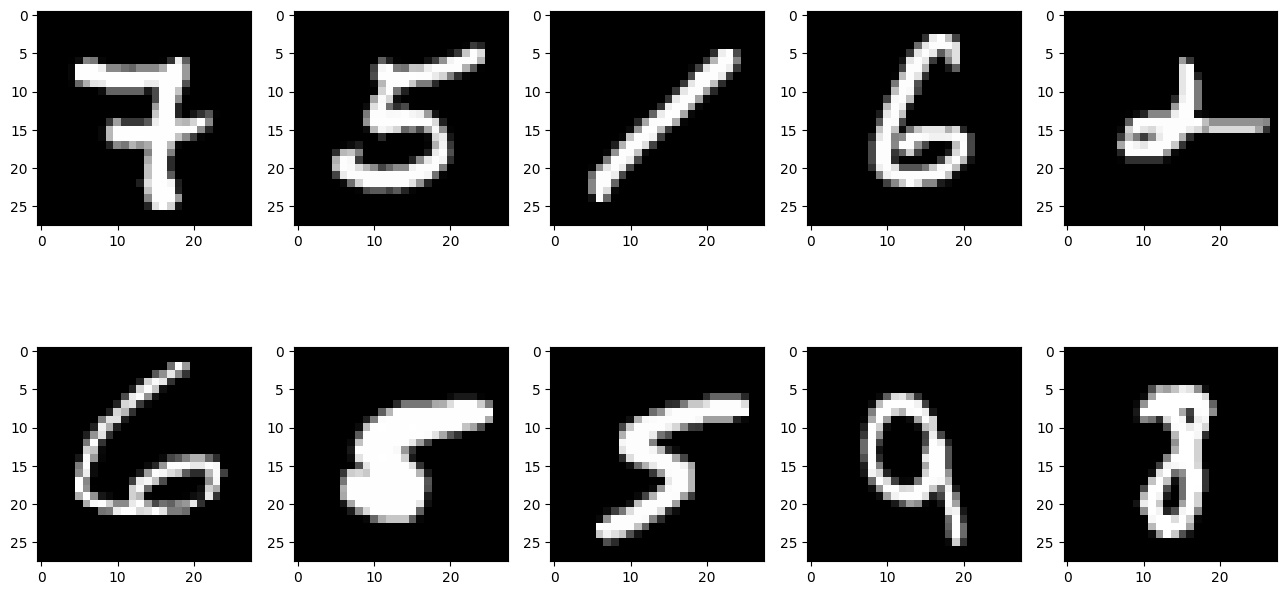

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8520 - loss: 0.5019
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9609 - loss: 0.1296
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9714 - loss: 0.0902
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9824 - loss: 0.0567
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9850 - loss: 0.0503
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9857 - loss: 0.0457
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9879 - loss: 0.0370
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9888 - loss: 0.0329
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0285


Plot the loss and accuracy graphs

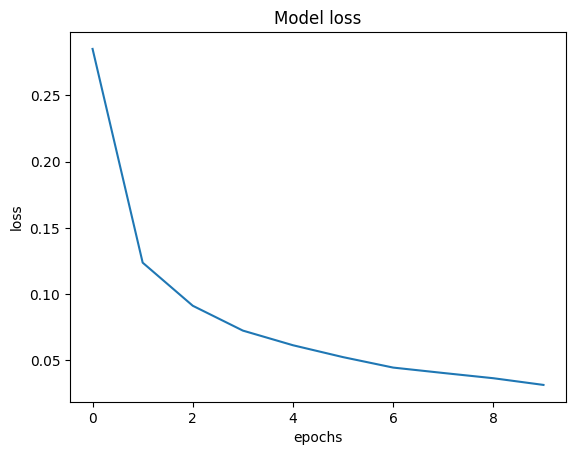

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

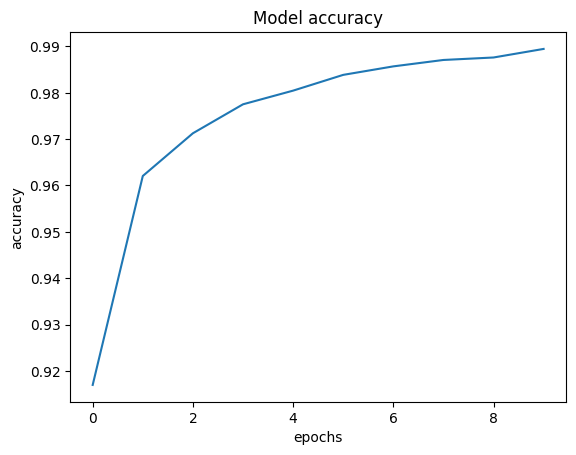

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1434
Loss of the Test dataset is: 0.12676997482776642
Accuracy of the test dataset is: 0.9685999751091003


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Build improved model with more units, dropout, and tuned learning rate
model_hp = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Lower learning rate for better convergence
model_hp.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

# Train with more epochs and batch size tuning
history_hp = model_hp.fit(
    new_train_data, new_train_target,
    epochs=10, batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test data
loss_hp, acc_hp = model_hp.evaluate(new_test_data, new_test_target, verbose=0)
print(f'Improved model test accuracy: {acc_hp:.4f}')


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7823 - loss: 0.7038 - val_accuracy: 0.9648 - val_loss: 0.1236
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9436 - loss: 0.1908 - val_accuracy: 0.9727 - val_loss: 0.0893
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9588 - loss: 0.1375 - val_accuracy: 0.9768 - val_loss: 0.0768
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9678 - loss: 0.1057 - val_accuracy: 0.9800 - val_loss: 0.0689
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9725 - loss: 0.0868 - val_accuracy: 0.9788 - val_loss: 0.0720
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9755 - loss: 0.0799 - val_accuracy: 0.9808 - val_loss: 0.0675
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9778 - loss: 0.0690 - val_accuracy: 0.9803 - val_loss: 0.0695
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9818 - loss: 0.0605 - val_accuracy:

In [14]:
from tensorflow.keras import regularizers

# Build model with L2 regularization
model_l2 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_l2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

history_l2 = model_l2.fit(
    new_train_data, new_train_target,
    epochs=10, batch_size=128,
    validation_split=0.1,
    verbose=1
)

loss_l2, acc_l2 = model_l2.evaluate(new_test_data, new_test_target, verbose=0)
print(f'L2 regularization test accuracy: {acc_l2:.4f}')


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7833 - loss: 0.7459 - val_accuracy: 0.9630 - val_loss: 0.1787
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9430 - loss: 0.2380 - val_accuracy: 0.9690 - val_loss: 0.1464
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9601 - loss: 0.1881 - val_accuracy: 0.9775 - val_loss: 0.1288
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9664 - loss: 0.1664 - val_accuracy: 0.9787 - val_loss: 0.1283
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9705 - loss: 0.1499 - val_accuracy: 0.9812 - val_loss: 0.1205
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9743 - loss: 0.1375 - val_accuracy: 0.9788 - val_loss: 0.1179
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9772 - loss: 0.1274 - val_accuracy: 0.9830 - val_loss: 0.1141
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9778 - loss: 0.1258 - val_accur

In [15]:
# Build model with L1 regularization
model_l1 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l1(1e-6)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1(1e-6)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_l1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

history_l1 = model_l1.fit(
    new_train_data, new_train_target,
    epochs=10, batch_size=128,
    validation_split=0.1,
    verbose=1
)

loss_l1, acc_l1 = model_l1.evaluate(new_test_data, new_test_target, verbose=0)
print(f'L1 regularization test accuracy: {acc_l1:.4f}')


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7799 - loss: 0.7037 - val_accuracy: 0.9632 - val_loss: 0.1350
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9425 - loss: 0.1995 - val_accuracy: 0.9723 - val_loss: 0.1005
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9599 - loss: 0.1428 - val_accuracy: 0.9788 - val_loss: 0.0836
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9685 - loss: 0.1144 - val_accuracy: 0.9785 - val_loss: 0.0829
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9728 - loss: 0.0986 - val_accuracy: 0.9808 - val_loss: 0.0791
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9753 - loss: 0.0892 - val_accuracy: 0.9818 - val_loss: 0.0746
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9778 - loss: 0.0791 - val_accuracy: 0.9842 - val_loss: 0.0695
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9806 - loss: 0.0725 - val_accura

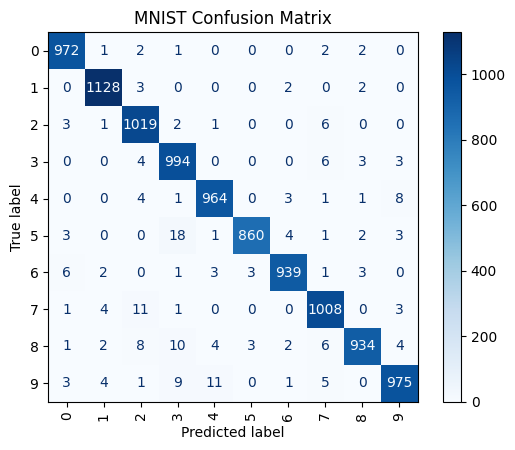

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Use the best model you trained — update variable name if needed
best_model = model_l1l2  # Change to model_hp / model_l2 / etc. based on your results

# Get predictions
y_prob = best_model.predict(new_test_data, batch_size=256, verbose=0)
y_pred = np.argmax(y_prob, axis=1)  # predicted class labels
y_true = test_target  # actual labels (integers 0-9)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.title('MNIST Confusion Matrix')
plt.show()

# Classification report (precision, recall, f1 per class)
print(classification_report(y_true, y_pred))


In [16]:
# Build model with both L1 and L2 regularization
model_l1l2 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-4)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-4)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_l1l2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

history_l1l2 = model_l1l2.fit(
    new_train_data, new_train_target,
    epochs=10, batch_size=128,
    validation_split=0.1,
    verbose=1
)

loss_l1l2, acc_l1l2 = model_l1l2.evaluate(new_test_data, new_test_target, verbose=0)
print(f'L1+L2 regularization test accuracy: {acc_l1l2:.4f}')


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7777 - loss: 0.7681 - val_accuracy: 0.9647 - val_loss: 0.1780
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9431 - loss: 0.2482 - val_accuracy: 0.9678 - val_loss: 0.1531
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9566 - loss: 0.1972 - val_accuracy: 0.9715 - val_loss: 0.1494
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9666 - loss: 0.1713 - val_accuracy: 0.9763 - val_loss: 0.1304
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9718 - loss: 0.1523 - val_accuracy: 0.9807 - val_loss: 0.1255
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9737 - loss: 0.1440 - val_accuracy: 0.9805 - val_loss: 0.1195
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9747 - loss: 0.1421 - val_accuracy: 0.9812 - val_loss: 0.1259
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9760 - loss: 0.1347 - val_acc

Save the model weights

In [11]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS_V1.h5